<a href="https://colab.research.google.com/github/Archandra12/Term4-Projects/blob/main/Groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**

1. [Introduction](#Section1)<br><br>
2. [Problem Statement](#Section2)<br><br>
3. [Dataset](#Section3)<br><br>
4. [Load Libraries](#Section4)<br><br>
5. [Pre-processing](#Section5)<br><br>
6. [Model evaluation](#Section6)

##Load Libraries

In [3]:
import numpy as np
import pandas as pd

In [5]:
file_path = "/content/sample_data/data.csv"
df = pd.read_csv(file_path, sep=",")
df

,item0,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(9835, 32)

### Apriori algorithm takes the list of items that were bought together as input. Hence, we need to get each row 
### as list (except 1st column and 'NAN' in the columns).
### Create a list of trasactions


In [52]:
transactions = []

# Add all the items from each row in one list( Neglect the 1st columns where all the items are in number (0-9))
for i in range(0, 9835):
    transactions.append([str(df.values[i,u])  for u in range(0, 32) if pd.notnull(df.values[i,u])])

In [55]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,...,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,Fa

In [69]:
def apply_num(x):
  if x==True:
    return 1
  else:
    return 0  
df_num = df_new.applymap(apply_num)

In [73]:
df_num.sum()

Instant food products      79
UHT-milk                  329
abrasive cleaner           35
artif. sweetener           32
baby cosmetics              6
                         ... 
white bread               414
white wine                187
whole milk               2513
yogurt                   1372
zwieback                   68
Length: 169, dtype: int64

In [80]:
df_item_count = pd.DataFrame(df_num.sum()).reset_index()
df_item_count.columns = ['item', 'count']

In [81]:
df_item_count

,item,count
0,Instant food products,79
1,UHT-milk,329
2,abrasive cleaner,35
3,artif. sweetener,32
4,baby cosmetics,6
...,...,...
164,white bread,414
165,white wine,187
166,whole milk,2513
167,yogurt,1372


In [82]:
import plotly.express as px
fig = px.bar(df_item_count,
             y="count",
             x="item",
             color="item")
fig.show()

In [60]:
from mlxtend.frequent_patterns import apriori

apriori(df_new, min_support=0.01, use_colnames=True)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(root vegetables, yogurt, whole milk)"
330,0.010473,"(soda, yogurt, whole milk)"
331,0.015150,"(tropical fruit, yogurt, whole milk)"


In [62]:
frequent_itemsets = apriori(df_new, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.033452,(UHT-milk),1
1,0.017692,(baking powder),1
2,0.052466,(beef),1
3,0.033249,(berries),1
4,0.026029,(beverages),1
...,...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)",3
329,0.014540,"(root vegetables, yogurt, whole milk)",3
330,0.010473,"(soda, yogurt, whole milk)",3
331,0.015150,"(tropical fruit, yogurt, whole milk)",3


In [63]:
frequent_itemsets[frequent_itemsets['length']>1]

,support,itemsets,length
88,0.019725,"(other vegetables, beef)",2
89,0.013625,"(beef, rolls/buns)",2
90,0.017387,"(root vegetables, beef)",2
91,0.021251,"(beef, whole milk)",2
92,0.011693,"(beef, yogurt)",2
...,...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)",3
329,0.014540,"(root vegetables, yogurt, whole milk)",3
330,0.010473,"(soda, yogurt, whole milk)",3
331,0.015150,"(tropical fruit, yogurt, whole milk)",3


In [65]:
from mlxtend.frequent_patterns import association_rules
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.0)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
6,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
7,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
8,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275
9,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222


In [13]:
#!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5977 sha256=bb7ebc67d8ea3f64e3dd9f5b26b1bc4839ddfdca3a383ffe42e3ddfedb5af187
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [66]:
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
418,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
491,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
436,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
412,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
568,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
574,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
442,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
594,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
550,"(root vegetables, rolls/buns)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
460,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003


To explain how to draw inference explore the first rule we can see that toast and coffee are commonly bought together. This makes sense since people who purchase toast would like to have coffee with it.

The support value for the this rule is 0.023666. This number is calculated by dividing the number of transactions containing toast divided by total number of transactions.
The confidence level for the rule is 0.704403 which shows that out of all the transactions that contain toast , 70.44% of the transactions also contain coffee.
Finally, the lift of 1.47 tells us that coffee is 1.47 times more likely to be bought by the customers who buy toast compared to the default likelihood of the sale of coffee.
For observing the rules where confidence is greater than or equal to 0.55

In [ ]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

How do we interpret these rules?

55% of the customers who bought a pastry also bought a coffee.

60% of the customers who bought a spanish brunch also bought a coffee.

70% of the customers who bought a toast also bought a coffee.

And so on.

Visualizing the association

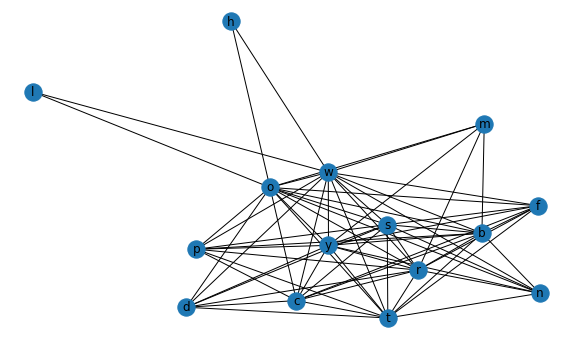

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

6. Conclusion
Coffee is the bestseller of this bakery and it shows association with 4 items- pastry, toast, medialuna and spanish brunch. There are a couple of strategies that the bakery can adopt to increase its sales considering the association we have seen between coffee and its 4 partners.
Example	Strategy
	Promotional discount in either one of the 4 partners can entice customers to buy coffee
	Placing these 4 items close to coffee ordering counter can be a good strategy to attract customers in buying these.
Thus, we have a fundamental thought of how to build a product recommendation system for retail stores, however in the event that you have complex data like Amazon or Netflix you should construct recommendation system utilizing recommendation filtering methods like Collaborative Filtering and Content-based filtering.